# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Gathering

In [4]:
df = pd.read_csv("diabetes.csv.xls")

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,500,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,102,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,122.242188,69.662760,20.536458,79.799479,31.992578,0.471876,33.308594,0.348958
std,3.369578,49.001676,24.827374,15.952218,115.244002,7.884160,0.331329,11.998145,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,1150.000000,500.000000,99.000000,846.000000,67.100000,2.420000,102.000000,1.000000


In [8]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
df["Outcome"].unique()  # it is a categorical value, and it is a target variable (dependent variable) i.e. y

array([1, 0], dtype=int64)

<Axes: xlabel='Outcome', ylabel='Count'>

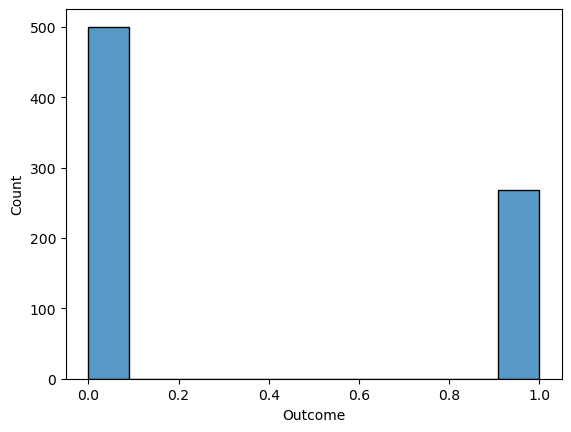

In [10]:
sns.histplot(df["Outcome"])

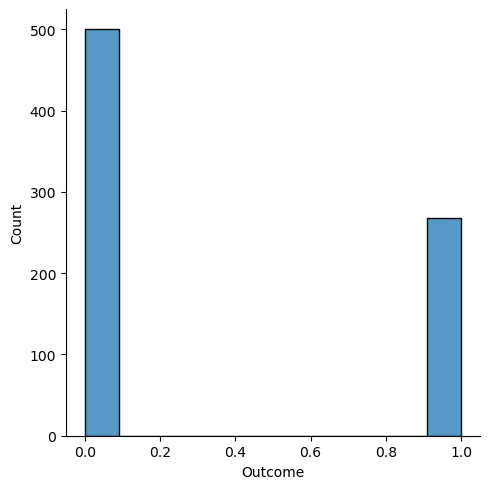

In [11]:
sns.displot(df["Outcome"])

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,500,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,102,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
# separating the Dependent & Independent Columns

x = df[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]

y = df[["Outcome"]]

In [14]:
print(x.shape[1])
print(y.shape[1])

8
1


# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

In [16]:
print(x_train.shape)
print(x_test.shape)

(576, 8)
(192, 8)


In [17]:
y_train.value_counts()

Outcome
0          366
1          210
Name: count, dtype: int64

In [18]:
y_test.value_counts()

Outcome
0          134
1           58
Name: count, dtype: int64

# Model Building

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [20]:
model.fit(x_train,y_train)

LogisticRegression()

# Predicting

In [21]:
ypred = model.predict(x_test)
ypred[:10]       # this is Predcited Value

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [22]:
y_test.head(10)   # this is Actual Value

,Outcome
158,0
251,0
631,0
757,1
689,1
573,0
553,0
728,0
183,0
515,1


# Model Evaluation

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report # classification_report = Precision & Recall

In [24]:
conf_matrix = confusion_matrix(ypred, y_test)
conf_matrix

array([[121,  30],
       [ 13,  28]], dtype=int64)

In [25]:
accuracy = accuracy_score(ypred, y_test)
accuracy

0.7760416666666666

In [26]:
report = classification_report(ypred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       151
           1       0.48      0.68      0.57        41

    accuracy                           0.78       192
   macro avg       0.69      0.74      0.71       192
weighted avg       0.81      0.78      0.79       192



In [27]:
ypred_probability = model.predict_proba(x_test)
ypred_probability

array([[0.91381546, 0.08618454],
       [0.81022227, 0.18977773],
       [0.87263059, 0.12736941],
       [0.68751712, 0.31248288],
       [0.38656977, 0.61343023],
       [0.83875708, 0.16124292],
       [0.90404183, 0.09595817],
       [0.72845125, 0.27154875],
       [0.90348603, 0.09651397],
       [0.57745729, 0.42254271],
       [0.64529818, 0.35470182],
       [0.52641674, 0.47358326],
       [0.53102665, 0.46897335],
       [0.74819207, 0.25180793],
       [0.93044387, 0.06955613],
       [0.25144846, 0.74855154],
       [0.38483188, 0.61516812],
       [0.95265625, 0.04734375],
       [0.74161571, 0.25838429],
       [0.17133146, 0.82866854],
       [0.07392395, 0.92607605],
       [0.37651956, 0.62348044],
       [0.84472922, 0.15527078],
       [0.48382033, 0.51617967],
       [0.87988461, 0.12011539],
       [0.82853031, 0.17146969],
       [0.27683356, 0.72316644],
       [0.53897027, 0.46102973],
       [0.79971812, 0.20028188],
       [0.68750461, 0.31249539],
       [0.

In [28]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, f1_score

In [29]:
fpr, tpr, threshold = roc_curve(y_test, ypred_probability[:,1])

In [30]:
fpr

array([0.        , 0.        , 0.        , 0.00746269, 0.00746269,
       0.01492537, 0.01492537, 0.02985075, 0.02985075, 0.04477612,
       0.04477612, 0.05970149, 0.05970149, 0.06716418, 0.06716418,
       0.08208955, 0.08208955, 0.08955224, 0.08955224, 0.09701493,
       0.09701493, 0.15671642, 0.15671642, 0.17164179, 0.17164179,
       0.19402985, 0.19402985, 0.20149254, 0.20149254, 0.23134328,
       0.23134328, 0.24626866, 0.24626866, 0.26865672, 0.26865672,
       0.28358209, 0.28358209, 0.32089552, 0.32089552, 0.35074627,
       0.35074627, 0.3880597 , 0.3880597 , 0.40298507, 0.40298507,
       0.47014925, 0.47014925, 0.52985075, 0.52985075, 0.55970149,
       0.55970149, 0.56716418, 0.56716418, 0.64179104, 0.64179104,
       0.6641791 , 0.6641791 , 0.70895522, 0.70895522, 0.78358209,
       0.78358209, 1.        ])

In [31]:
tpr

array([0.        , 0.01724138, 0.03448276, 0.03448276, 0.13793103,
       0.13793103, 0.18965517, 0.18965517, 0.24137931, 0.24137931,
       0.27586207, 0.27586207, 0.36206897, 0.36206897, 0.37931034,
       0.37931034, 0.39655172, 0.39655172, 0.4137931 , 0.4137931 ,
       0.51724138, 0.51724138, 0.53448276, 0.53448276, 0.56896552,
       0.56896552, 0.62068966, 0.62068966, 0.63793103, 0.63793103,
       0.67241379, 0.67241379, 0.68965517, 0.68965517, 0.72413793,
       0.72413793, 0.74137931, 0.74137931, 0.77586207, 0.77586207,
       0.79310345, 0.79310345, 0.82758621, 0.82758621, 0.84482759,
       0.84482759, 0.87931034, 0.87931034, 0.89655172, 0.89655172,
       0.9137931 , 0.9137931 , 0.93103448, 0.93103448, 0.94827586,
       0.94827586, 0.96551724, 0.96551724, 0.98275862, 0.98275862,
       1.        , 1.        ])

Text(0, 0.5, 'True Positive Rate')

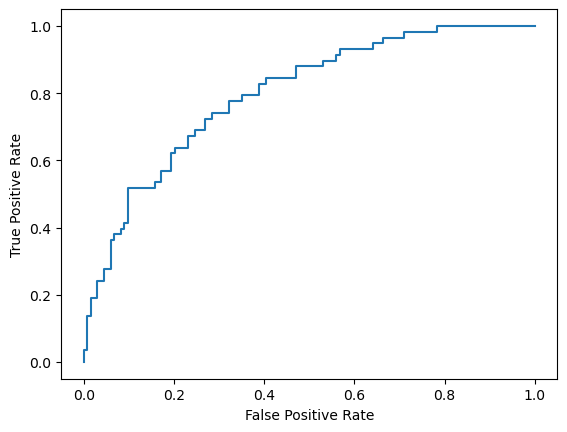

In [32]:
plt.plot(fpr, tpr)  # by this graph we check hamara classifier kitna achha work karta hai.
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")